In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
cd drive/My Drive/AtoZ/Deep_Learning_A_Z/Boltzmann_Machines

[Errno 2] No such file or directory: 'drive/My Drive/AtoZ/Deep_Learning_A_Z/Boltzmann_Machines'
/content/drive/My Drive/AtoZ/Deep_Learning_A_Z/Boltzmann_Machines


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
#Importing dataset
movies_df = pd.read_csv('ml-1m/movies.dat', sep='::', header=None, engine='python', encoding = 'latin-1', names=['movie_id', 'movie_title','genre'])
movies_df.head()

,movie_id,movie_title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [27]:
users_df = pd.read_csv('ml-1m/users.dat', sep='::', header=None, engine='python', encoding = 'latin-1', names=['user_id','gender','age','occupation','zip_code'])
users_df.head()

,user_id,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [28]:
ratings_df = pd.read_csv('ml-1m/ratings.dat', sep='::', header=None, engine='python', encoding = 'latin-1', names=['user_id','movie_id','rating','timestamp'])
ratings_df.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [29]:
movies_df['list_index'] = movies_df.index
movies_df.head()

,movie_id,movie_title,genre,list_index
0,1,Toy Story (1995),Animation|Children's|Comedy,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama,3
4,5,Father of the Bride Part II (1995),Comedy,4


In [30]:
"""
- Our Movie ID's vary from 1 to 3952 while we have 3883 movies. 
- Due to this, we won't be able to index movies through their ID since we would get memory indexing errors. 
- To amend we can create a column that shows the spot in our list that particular movie is in:
"""
merged_df = movies_df.merge(ratings_df, on='movie_id')
merged_df.head()

,movie_id,movie_title,genre,list_index,user_id,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,0,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,0,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,0,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,0,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,0,10,5,978226474


In [31]:
merged_df = merged_df.drop('timestamp', axis=1)
merged_df = merged_df.drop('movie_title', axis=1)
merged_df = merged_df.drop('genre', axis=1)
merged_df.head()

,movie_id,list_index,user_id,rating
0,1,0,1,5
1,1,0,6,4
2,1,0,8,4
3,1,0,9,5
4,1,0,10,5


In [32]:
user_group = merged_df.groupby('user_id')
user_group.head()

,movie_id,list_index,user_id,rating
0,1,0,1,5
1,1,0,6,4
2,1,0,8,4
3,1,0,9,5
4,1,0,10,5
5,1,0,18,4
6,1,0,19,5
7,1,0,21,3
8,1,0,23,4
9,1,0,26,3


In [33]:
trX = []

for user_id, curUser in user_group:
  temp = np.zeros(len(movies_df))
  
  for num, movie in curUser.iterrows():
    temp[movie['list_index']] = movie['rating']/5.0
  trX.append(temp)
  
trX

[array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.8, 0. , 0. , ..., 0. , 0. , 0. ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.8, 0. , 0. , ..., 0. , 0. , 0. ]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0. , 0.6, 0. , ..., 0. , 0. , 0. ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.8, 0.4, 0. , ..., 0. , 0. , 0. ]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.6, 0. , 0. , ..., 0. , 0. , 0. ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.8, 0.4, 0. , ..., 0. , 0. , 0.8]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0.,

In [0]:
#setting the model parameters

hiddenUnits = 128
visibleUnits = len(movies_df)
vb = tf.placeholder(tf.float32,[visibleUnits])
hb = tf.placeholder(tf.float32,[hiddenUnits])
W = tf.placeholder(tf.float32,[visibleUnits,hiddenUnits])

In [0]:
#Input processing
v0 = tf.placeholder(tf.float32,[None,visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0,W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

In [0]:
#Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0,tf.transpose(W)) + vb)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1,W) + hb)

In [0]:
#gradients
w_pos_grad = tf.matmul(tf.transpose(v0),h0)
w_neg_grad = tf.matmul(tf.transpose(v1),h1)

In [0]:
# Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])

In [0]:
# Create methods to update the weights and biases
update_w = W +  CD
update_vb = vb +  tf.reduce_mean(v0 - v1, 0)
update_hb = hb +  tf.reduce_mean(h0 - h1, 0)

In [0]:
err = v0 - v1
err_sum = tf.reduce_mean(err*err)

In [0]:
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
cur_vb = np.zeros([visibleUnits], np.float32)
cur_hb = np.zeros([hiddenUnits], np.float32)
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
prv_vb = np.zeros([visibleUnits], np.float32)
prv_hb = np.zeros([hiddenUnits], np.float32)

In [0]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

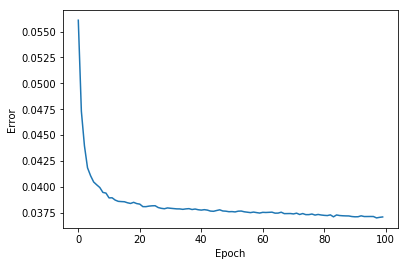

In [54]:
epochs = 100
batchsize = 100
errors = []
for i in range(epochs):
  for start, end in zip(range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
    batch = trX[start:end]
    cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb:prv_hb})
    cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
    cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
    prv_w = cur_w
    prv_vb = cur_vb
    prv_hb = cur_hb
  errors.append(sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb}))
  #print(errors)
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [55]:
#Recommendations

inputUser = [trX[50]]
inputUser

[array([1., 0., 0., ..., 0., 0., 0.])]

In [0]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={hh0: feed, W: prv_w, vb: prv_vb})

In [57]:
scored_movies_df_50 = movies_df
scored_movies_df_50["recommended_score"] = rec[0]
scored_movies_df_50.head()

,movie_id,movie_title,genre,list_index,recommended_score
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0.266652
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,0.012281
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0.009992
3,4,Waiting to Exhale (1995),Comedy|Drama,3,0.001621
4,5,Father of the Bride Part II (1995),Comedy,4,0.020990


In [58]:
#taking record number 50
print(merged_df.iloc[50])

movie_id        1
list_index      0
user_id       150
rating          4
Name: 50, dtype: int64


In [63]:
#all movies user has watched before
movies_df_50 = merged_df[merged_df['user_id']==150]
movies_df_50.head()

,movie_id,list_index,user_id,rating
50,1,0,150,4
11866,24,23,150,4
12492,25,24,150,4
15967,34,33,150,5
36528,111,109,150,4


In [0]:
#merge movies that user has watched with the predicted scores
merged_df_50 = scored_movies_df_50.merge(movies_df_50, on='movie_id', how='outer')

In [65]:
merged_df_50

,movie_id,movie_title,genre,list_index_x,recommended_score,list_index_y,user_id,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0.266652,0.0,150.0,4.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,0.012281,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0.009992,NaN,NaN,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,3,0.001621,NaN,NaN,NaN
4,5,Father of the Bride Part II (1995),Comedy,4,0.020990,NaN,NaN,NaN
5,6,Heat (1995),Action|Crime|Thriller,5,0.001634,NaN,NaN,NaN
6,7,Sabrina (1995),Comedy|Romance,6,0.003423,NaN,NaN,NaN
7,8,Tom and Huck (1995),Adventure|Children's,7,0.001688,NaN,NaN,NaN
8,9,Sudden Death (1995),Action,8,0.000383,NaN,NaN,NaN
9,10,GoldenEye (1995),Action|Adventure|Thriller,9,0.009470,NaN,NaN,NaN


In [0]:
merged_df_50 = merged_df_50.drop('list_index_y', axis=1).drop('user_id', axis=1)

In [67]:
merged_df_50

,movie_id,movie_title,genre,list_index_x,recommended_score,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0.266652,4.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1,0.012281,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,2,0.009992,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama,3,0.001621,NaN
4,5,Father of the Bride Part II (1995),Comedy,4,0.020990,NaN
5,6,Heat (1995),Action|Crime|Thriller,5,0.001634,NaN
6,7,Sabrina (1995),Comedy|Romance,6,0.003423,NaN
7,8,Tom and Huck (1995),Adventure|Children's,7,0.001688,NaN
8,9,Sudden Death (1995),Action,8,0.000383,NaN
9,10,GoldenEye (1995),Action|Adventure|Thriller,9,0.009470,NaN


In [0]:
watched_pred_50 = merged_df_50

In [83]:
watched_pred_50.sort_values(['recommended_score'],ascending=False)

,movie_id,movie_title,genre,list_index_x,recommended_score,rating
584,588,Aladdin (1992),Animation|Children's|Comedy|Musical,584,0.667430,NaN
2983,3052,Dogma (1999),Comedy,2983,0.420031,NaN
589,593,"Silence of the Lambs, The (1991)",Drama|Thriller,589,0.326322,5.0
1179,1197,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,1179,0.293840,NaN
2693,2762,"Sixth Sense, The (1999)",Thriller,2693,0.284272,4.0
2618,2687,Tarzan (1999),Animation|Children's,2618,0.282800,NaN
3548,3617,Road Trip (2000),Comedy,3548,0.280825,NaN
1838,1907,Mulan (1998),Animation|Children's,1838,0.275061,NaN
360,364,"Lion King, The (1994)",Animation|Children's|Musical,360,0.274600,4.0
1250,1270,Back to the Future (1985),Comedy|Sci-Fi,1250,0.269897,4.0
